# Iterate over files in a folder

In [17]:
from pathlib import Path

input_dir = Path.cwd() / "/home/franol/Database/ProductMatch" # insert here the file path of the directory on your machine
# on windows computer insert the path like this r"C:\Users\your\file\path

# glob = specific folder
# rglob = including subfolder
files = list(input_dir.rglob("*.xlsx*"))
files

[PosixPath('/home/franol/Database/ProductMatch/CRD/ProductMatch_2015.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/DJI/ProductMatch_2013.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/BDI/ProductMatch_2014.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/CIV/ProductMatch_2016.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/ZAF/ProductMatch_2015.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/MAR/ProductMatch_2016.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/MLI/ProductMatch_2014.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/NER/ProductMatch_2016.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/UGA/ProductMatch_2010.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/CMR/ProductMatch_2016.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/BFA/ProductMatch_2015.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/BEN/ProductMatch_2015.xlsx'),
 PosixPath('/home/franol/Database/ProductMatch/MRT/ProductMatch_2015.xlsx'),

# Merge all Excel files

In [18]:
from pathlib import Path
import pandas as pd  # pip install pandas

# Store dataframes in a list
parts = []
for path in list(input_dir.rglob("*.xlsx*")):
    part = pd.read_excel(path)
    parts.append(part)

In [19]:
# Concatenate dataframes
df = pd.concat(parts)

# Save merged dataframe to output directory
output_dir = Path.cwd() / "MasterFile"
output_dir.mkdir(exist_ok=True)
df.to_excel(output_dir / "masterfile.xlsx", index=False)

In [20]:
df.head()

,ProductCode,ProductDescription,CPC21Code,CPC21Description,Unnamed: 4
0,10,Produits de l'agriculture vivriere,01,NaN,NaN
1,20,Produits de l'agriculture industrielle et d'exportation,01,NaN,NaN
2,30,"Produits de l'elevage, peche, pisciculture",02; 04,NaN,NaN
3,40,"Produits de la foret, exploitation forestiere,..",03,NaN,NaN
4,51,"Hydrocarbures, charbon, ..",11; 12,NaN,NaN


#### Whenever unwanted coloumns apper we can delete them like this before proceding to analyzing the data 

In [21]:
df.drop('Unnamed: 4', axis=1, inplace=True)

In [22]:
# Show the data frame
df.fillna(0,inplace=True)
df = df.reset_index(drop=True)
df.head()

,ProductCode,ProductDescription,CPC21Code,CPC21Description
0,10,Produits de l'agriculture vivriere,01,0
1,20,Produits de l'agriculture industrielle et d'exportation,01,0
2,30,"Produits de l'elevage, peche, pisciculture",02; 04,0
3,40,"Produits de la foret, exploitation forestiere,..",03,0
4,51,"Hydrocarbures, charbon, ..",11; 12,0


In [23]:
# Replacing out any NAN value with Zero
df[df.isnull().any(axis=1)]

,ProductCode,ProductDescription,CPC21Code,CPC21Description


## from here you can filter the database as desired using the product descriptions 

In [24]:

df2 = df[df['ProductDescription'].str.contains('peche', na = False)]
df2

,ProductCode,ProductDescription,CPC21Code,CPC21Description
2,30,"Produits de l'elevage, peche, pisciculture",02; 04,0
510,23,Produits de le peche et de la pisciculture,04,Fish and other fishing products
680,23,Produits de le peche et de la pisciculture,04,Fish and other fishing products


#### If you want to download the cleand dataframe to excel file run the below code

In [25]:

df.to_excel('cleaned.xlsx', index = False)

### which code appere the most?

In [26]:
df["CPC21Code"].value_counts()


01        28
0         25
61; 62    20
91        17
92        17
          ..
1640       1
88; 89     1
496        1
495        1
81         1
Name: CPC21Code, Length: 746, dtype: int64

[Text(0, 0.5, 'CPC21Code'), Text(0.5, 0, 'Frequency')]

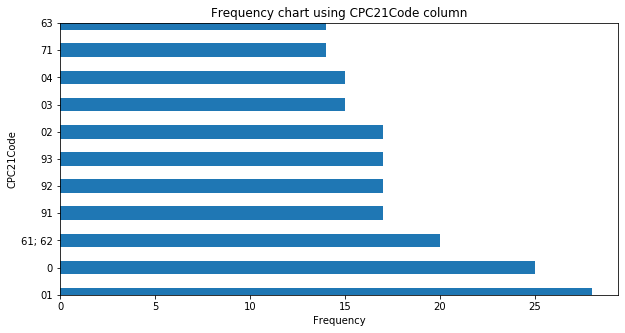

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10,5]
ax1 = df["CPC21Code"].value_counts().plot(kind='barh', title= "Frequency chart using CPC21Code column")
ax1.set_ylim(0,10)
ax1.set(xlabel="Frequency", ylabel="CPC21Code")

## <strong> using the "CPC21Code" columne we can see that the most frequent code is 01</strong>

[Text(0, 0.5, 'ProductCode'), Text(0.5, 0, 'Frequency')]

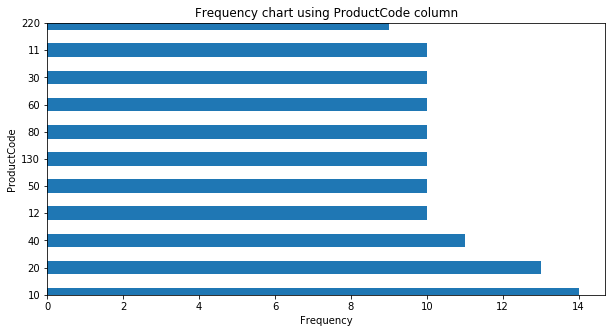

In [28]:
plt.rcParams["figure.figsize"] = [10,5]
ax1 = df["ProductCode"].value_counts().plot(kind='barh', title= "Frequency chart using ProductCode column")
ax1.set_ylim(0,10)
ax1.set(xlabel="Frequency", ylabel="ProductCode")

### <strong> from the Productcode column the most frequent code is 10</strong>

## copying data frame for backup ;)

In [29]:
df2 = df.copy(deep = True)

In [30]:
df2.head()

,ProductCode,ProductDescription,CPC21Code,CPC21Description
0,10,Produits de l'agriculture vivriere,01,0
1,20,Produits de l'agriculture industrielle et d'exportation,01,0
2,30,"Produits de l'elevage, peche, pisciculture",02; 04,0
3,40,"Produits de la foret, exploitation forestiere,..",03,0
4,51,"Hydrocarbures, charbon, ..",11; 12,0


## reading new country and changing it to a dataframe

In [31]:
new_country = pd.read_excel('GHA_products.xlsx', sheet_name= 'Sheet1')
new_country

,ProductCode,ProductDescription
0,P01-02,"Products of agriculture, hunting and livestock"
1,P03,Forestry and logging products
2,P04,Fish and other fishing products
3,P11-16,Ores and minerals
4,P12,Crude petroleum and natural gas
...,...,...
15,P84,"Telecommunications, broadcasting and information supply services"
16,P91,Public administration and other services provided to the community as a whole; compulsory social security services
17,P92,Education services
18,P93,Human health and social care services


In [32]:
new_country.shape

(20, 2)

### created a file that containf CPC21Code and there respective code

In [33]:
CPC21 = pd.read_csv('CPC21Code.csv')

In [34]:
CPC21.head()

,ProductDescription,CPC21Code
0,Activities of sports clubs,96512
1,Defence activities,9124; 9125
2,Funeral and related activities,973
3,Hairdressing and other beauty treatment,972
4,Higher education,925


In [35]:
CPC21.shape

(1051, 2)

### Loop over new_country 

In [36]:
ghana_product_description = new_country.ProductDescription;

matched_descriptions = {};
for product_description in ghana_product_description:
  line = product_description.split()
  line = [word for word in line if word.lower() not in ['and', 'of', 'services', 'product', 'products', 'to', 'the', 'as', 'a', 'related', 'other']]
  
  for description in line:
    cp = CPC21[CPC21['ProductDescription'].str.contains(description, na = False)]
    if cp.empty:
      continue;
    else:
      matched_descriptions[product_description] = cp['CPC21Code'].values[0]
      break

new_country['CPC21Code'] = new_country['ProductDescription'].map(matched_descriptions)

### Merging the new_country with the database

In [37]:

df3 = pd.concat([df2, new_country], ignore_index=True)

df3.shape

(1303, 4)